# COURSEWORK

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler

%config InLineBackend.figure_format='svg'
%matplotlib inline

In [3]:
matplotlib.rcParams.update({'font.size': 14})

### Изучение качества данных и их очистка

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18, 10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    
    plt.show()

In [5]:
df = pd.read_csv('Downloads/train.csv')

In [6]:
df['DistrictId'] = df['DistrictId'].astype(str)
df['Id'] = df['Id'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

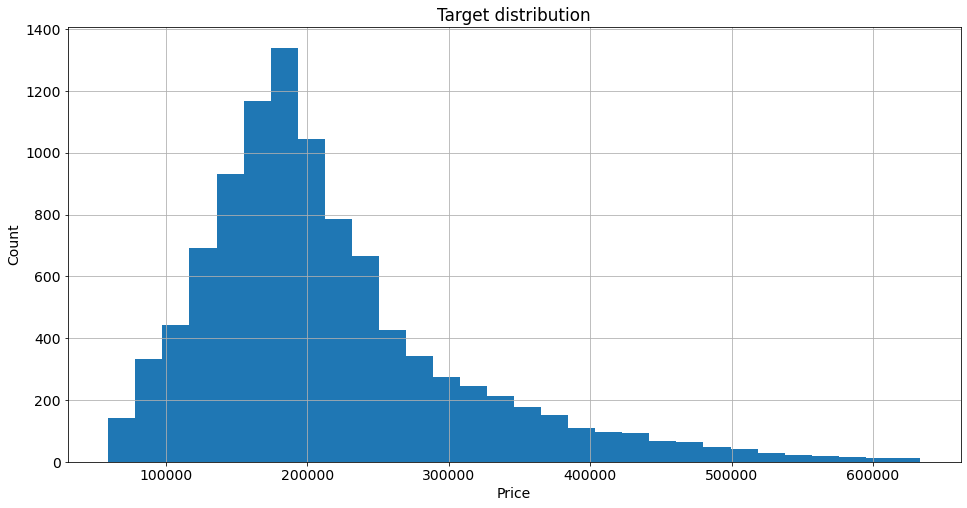

In [8]:
plt.figure(figsize = (16, 8))

df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [9]:
df.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [10]:
df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [11]:
df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [12]:
df['DistrictId'].value_counts().head(5)

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64

In [13]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [14]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [15]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### Обработка выбросов и аномалей

#### Rooms

In [16]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [17]:
df.loc[df['Rooms'].isin([10, 19, 0, 6]), 'Rooms'] = df['Rooms'].median()

#### Обработка площадей

In [18]:
df = df[df['Square'].isnull() |
        (df['Square'] < df['Square'].quantile(.975)) |
        (df['Square'] > df['Square'].quantile(.025))]

df = df[df['LifeSquare'].isnull() |
        (df['LifeSquare'] < df['LifeSquare'].quantile(.975)) |
        (df['LifeSquare'] > df['LifeSquare'].quantile(.025)) |
        (df['LifeSquare'] > df['Square'])]

df = df[df['KitchenSquare'].isnull() |
        (df['KitchenSquare'] < df['KitchenSquare'].quantile(.975)) |
        (df['KitchenSquare'] > df['Square'])]

df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [19]:
df.shape

(9748, 20)

In [20]:
df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,  37.,
        38.,  39.,  40.,  44.,  45.,  48.,  99., 117.])

In [21]:
df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [22]:
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()

In [23]:
floor_outliers = df.loc[df['Floor'] > df['HouseFloor']].index
df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [24]:
df['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
7076        2020
4493        2020
5701        2020
          ...   
8505        1918
8144        1917
5053        1917
1380        1917
910         1914
Name: HouseYear, Length: 9748, dtype: int64

In [25]:
df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2011

In [26]:
len(df) - df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2102
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4676
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [27]:
df['LifeSquare'].median()

32.521497907276014

In [28]:
square_med_diff = (df.loc[df['LifeSquare'].notnull(), 'Square'] -\
                   df.loc[df['LifeSquare'].notnull(), 'LifeSquare'] -\
                   df.loc[df['LifeSquare'].notnull(), 'KitchenSquare']).median()

square_med_diff

11.293835126834932

In [29]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] =\
df.loc[df['LifeSquare'].isnull(), 'Square'] -\
df.loc[df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

In [30]:
df['LifeSquare'].median()

33.605805869111876

In [31]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

In [32]:
df['Ecology_2'] = (df['Ecology_2'] == 'B').astype(int)
df['Ecology_3'] = (df['Ecology_3'] == 'B').astype(int)
df['Shops_2'] = (df['Shops_2'] == 'B').astype(int)

In [33]:
df['Ecology_2'].value_counts()

1    9654
0      94
Name: Ecology_2, dtype: int64

In [34]:
df['Ecology_3'].value_counts()

1    9480
0     268
Name: Ecology_3, dtype: int64

In [35]:
df['Shops_2'].value_counts()

1    8959
0     789
Name: Shops_2, dtype: int64

### DistrictSize, IsDistrictSize

In [36]:
district_size = df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,811
1,1,646
2,23,546
3,6,503
4,9,292


In [37]:
df = df.merge(district_size, on='DistrictId', how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,1,33,7976,5,900.0,0,11,1,184966.930730,22
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,46,10309,1,240.0,1,16,1,300009.450063,86
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,1,34,7759,0,229.0,1,3,1,220925.908524,170
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1,23,5735,3,1084.0,0,5,1,175616.227217,174
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,35,5776,1,2078.0,2,4,1,150226.531644,97


In [38]:
df['IsDistrictLarge'] = (df['DistrictSize'] > 100).astype(int)

### MedPriceByDistrict

In [39]:
med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142486.170594
1,0,2.0,176210.812334
2,0,3.0,308098.189977
3,1,1.0,147110.201250
4,1,2.0,202626.530012


In [40]:
df = df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')

df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,7976,5,900.0,0,11,1,184966.930730,22,0,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,10309,1,240.0,1,16,1,300009.450063,86,0,297041.145784
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,7759,0,229.0,1,3,1,220925.908524,170,1,261705.465881
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,5735,3,1084.0,0,5,1,175616.227217,174,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,5776,1,2078.0,2,4,1,150226.531644,97,0,158539.052715


In [41]:
med_price_by_square = df.groupby(['Square'], as_index=False).agg({'Price':'median'})\
                      .rename(columns={'Price':'MedPriceBySquare'})
med_price_by_square.head()

,Square,MedPriceBySquare
0,1.136859,181434.825589
1,1.988943,458378.777006
2,2.377248,126596.941798
3,2.596351,137597.601458
4,2.954309,438005.182323


## Отбор признаков

In [42]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [43]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor','HouseFloor', 
                 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2',
                 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']

target_name = ['Price']

## Model

### Train&Test split

In [44]:
X = df[feature_names + new_feature_names]
y = df[target_name]

In [45]:
y = np.ravel(y)
y.shape

(9748,)

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=21)

### Обучение модели

In [47]:
rf_model = RandomForestRegressor(random_state=21)
rf_model.fit(X_train, np.ravel(y_train))

RandomForestRegressor(random_state=21)

### Отложенная выборка

Train R2:	0.966
Test R2:	0.739


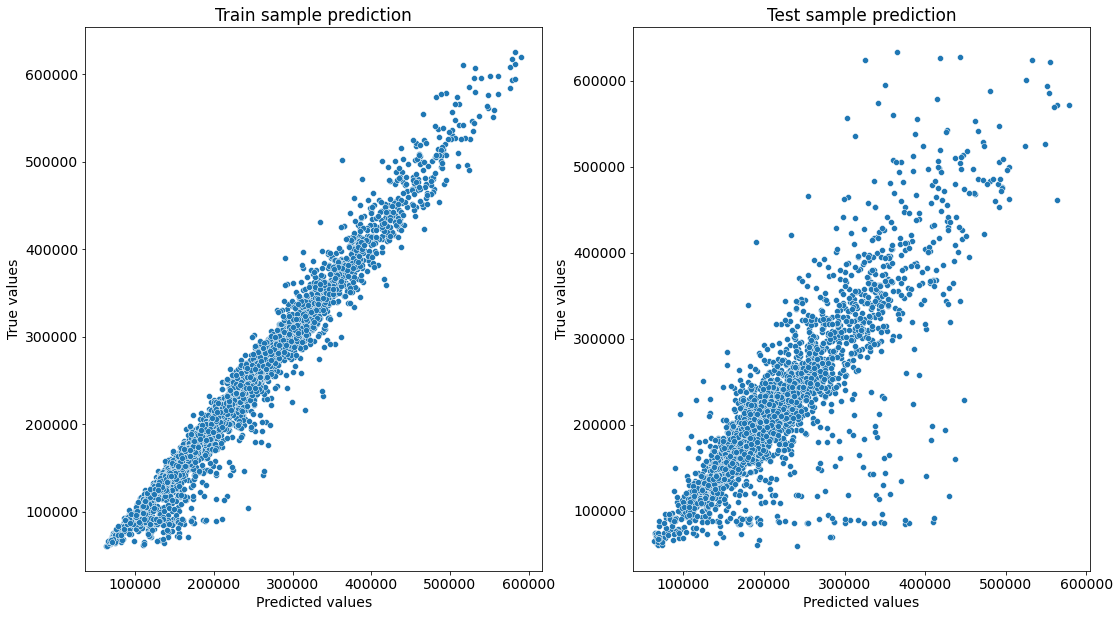

In [48]:
y_train_preds = rf_model.predict(X_train)
y_valid_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

### Cross validation

In [49]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.73949563, 0.77089834, 0.75247363])

In [50]:
cv_score.mean()

0.7542891983675578

### Feature importances

In [51]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
18,MedPriceByDistrict,0.640023
1,Square,0.116756
2,LifeSquare,0.032303
12,Social_3,0.028707
6,HouseYear,0.027763
3,KitchenSquare,0.024249
5,HouseFloor,0.022625
4,Floor,0.020729
11,Social_2,0.016759
7,Ecology_1,0.016439


# Test

### Обработка данных тестового датасета

In [55]:
test_df = pd.read_csv('Downloads/test.csv')

In [56]:
test_df.shape

(5000, 19)

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [58]:
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [59]:
test_df.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


### Обработка данных

In [60]:
test_df.select_dtypes(include='object').columns.tolist()

['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [61]:
test_df['Ecology_2'] = (test_df['Ecology_2'] == 'B').astype(int)
test_df['Ecology_3'] = (test_df['Ecology_3'] == 'B').astype(int)
test_df['Shops_2'] = (test_df['Shops_2'] == 'B').astype(int)

In [62]:
test_df['Ecology_2'].value_counts()

1    4952
0      48
Name: Ecology_2, dtype: int64

In [63]:
test_df['Ecology_3'].value_counts()

1    4851
0     149
Name: Ecology_3, dtype: int64

In [64]:
test_df['Shops_2'].value_counts()

1    4588
0     412
Name: Shops_2, dtype: int64

In [65]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

## Обработка выбросов

### Rooms

In [66]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

In [67]:
test_df.loc[test_df['Rooms'].isin([17, 0, 6]), 'Rooms'] = test_df['Rooms'].median()

#### Обработка площадей

In [68]:
test_df.loc[test_df['Square'].isnull() |
           (test_df['Square'] < test_df['Square'].quantile(.975)) |
           (test_df['Square'] > test_df['Square'].quantile(.025)), 'Square'] = test_df['Square'].median()

test_df.loc[test_df['LifeSquare'].isnull() |
           (test_df['LifeSquare'] < test_df['LifeSquare'].quantile(.975)) |
           (test_df['LifeSquare'] > test_df['LifeSquare'].quantile(.025)) |
           (test_df['LifeSquare'] > test_df['Square']), 'LifeSquare'] = test_df['LifeSquare'].median()

test_df.loc[test_df['KitchenSquare'].isnull() |
           (test_df['KitchenSquare'] < test_df['KitchenSquare'].quantile(.975)) |
           (test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.025)) |
           (test_df['KitchenSquare'] > test_df['Square']), 'KitchenSquare'] = test_df['KitchenSquare'].median()

In [69]:
test_df.shape

(5000, 19)

In [70]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()

In [71]:
floor_outliers = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index
test_df.loc[floor_outliers, 'Floor'] = test_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [72]:
test_df['HouseYear'].sort_values(ascending=False)

385     2020
888     2020
4273    2020
1275    2020
3382    2020
        ... 
1475    1912
64      1911
2691    1910
2       1909
3253    1908
Name: HouseYear, Length: 5000, dtype: int64

In [73]:
test_df['LifeSquare'].median()

32.92508663208161

In [74]:
square_med_diff = (test_df.loc[test_df['LifeSquare'].notnull(), 'Square'] -\
                   test_df.loc[test_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                   test_df.loc[test_df['LifeSquare'].notnull(), 'KitchenSquare']).median()

square_med_diff

13.996252930759134

In [75]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] =\
test_df.loc[test_df['LifeSquare'].isnull(), 'Square'] -\
test_df.loc[test_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

In [76]:
test_df['LifeSquare'].median()

32.92508663208161

### DistrictSize, IsDistrictLarge

In [77]:
district_size = test_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,391
1,1,344
2,23,264
3,6,257
4,9,132


In [78]:
test_df = test_df.merge(district_size, on='DistrictId', how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize
0,725,58,2.0,52.92134,32.925087,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,91
1,15856,74,2.0,52.92134,32.925087,6.0,1,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,61
2,5480,190,1.0,52.92134,32.925087,6.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,2
3,15664,47,2.0,52.92134,32.925087,6.0,22,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,49
4,14275,27,1.0,52.92134,32.925087,6.0,17,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,391


In [79]:
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)

In [80]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictSize,IsDistrictLarge
0,725,58,2.0,52.92134,32.925087,6.0,6,14.0,1972,0.310199,...,1,11,2748,1,900.0,0,0,1,91,0
1,15856,74,2.0,52.92134,32.925087,6.0,1,1.0,1977,0.075779,...,1,6,1437,3,900.0,0,2,1,61,0
2,5480,190,1.0,52.92134,32.925087,6.0,2,5.0,1909,0.000000,...,1,30,7538,87,4702.0,5,5,1,2,0
3,15664,47,2.0,52.92134,32.925087,6.0,22,22.0,2007,0.101872,...,1,23,4583,3,900.0,3,3,1,49,0
4,14275,27,1.0,52.92134,32.925087,6.0,17,17.0,2017,0.072158,...,1,2,629,1,900.0,0,0,0,391,1


### MedPriceByDistrict

In [81]:
med_price_by_district_test = df.groupby(['DistrictId'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district_test

,DistrictId,MedPriceByDistrict
0,0,163836.470764
1,1,183326.950246
2,10,218489.404742
3,100,234032.836228
4,101,184062.808521
...,...,...
199,95,293249.106761
200,96,197416.733287
201,97,190112.385476
202,98,191914.221629


In [82]:
test_df = test_df.merge(med_price_by_district_test, on=['DistrictId'], how='left')

### Отбор признаков

In [83]:
test_feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor','HouseFloor', 
                 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2',
                 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']

test_new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']

## Test_model

In [84]:
X_test = test_df[test_feature_names + test_new_feature_names]

In [85]:
X_test.loc[X_test['MedPriceByDistrict'].isnull(), 'MedPriceByDistrict'] = X_test['MedPriceByDistrict'].median()

In [86]:
y_test_preds = rf_model.predict(X_test)

In [87]:
y_test_preds.shape

(5000,)

In [91]:
pred_dataset = pd.DataFrame(y_test_preds, columns=['Price'])

In [92]:
pred_dataset.head()

,Price
0,157186.263682
1,191793.464310
2,473201.623732
3,222433.427547
4,164870.452388


In [93]:
pred_dataset.to_csv('Downloads/TKiyashev_predictions.csv')